<a href="https://colab.research.google.com/github/NaveenKumarae22/Prediction-of-Tesla-stock-prices-by-machine-learning-in-python/blob/main/Complete%20%20python%20code%20with%20results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date      Open      High       Low     Close  Adj Close    Volume
0  2012-01-17  1.774667  1.822667  1.760667  1.773333   1.773333  69774000
1  2012-01-18  1.779333  1.792000  1.750000  1.787333   1.787333  18903000
2  2012-01-19  1.812667  1.849333  1.774000  1.784000   1.784000  18694500
3  2012-01-20  1.793333  1.800000  1.760000  1.773333   1.773333   9934500
4  2012-01-23  1.787333  1.814000  1.773333  1.784667   1.784667   8919000
(3124, 7)
         Date      Open      High       Low     Close    Volume
0  2012-01-17  1.774667  1.822667  1.760667  1.773333  69774000
1  2012-01-18  1.779333  1.792000  1.750000  1.787333  18903000
2  2012-01-19  1.812667  1.849333  1.774000  1.784000  18694500
3  2012-01-20  1.793333  1.800000  1.760000  1.773333   9934500
4  2012-01-23  1.787333  1.814000  1.773333  1.784667   8919000
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
       Open      High       Low     Close    Volume  month  year  day
0

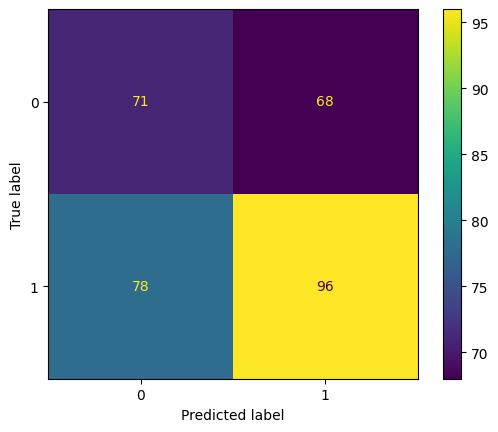

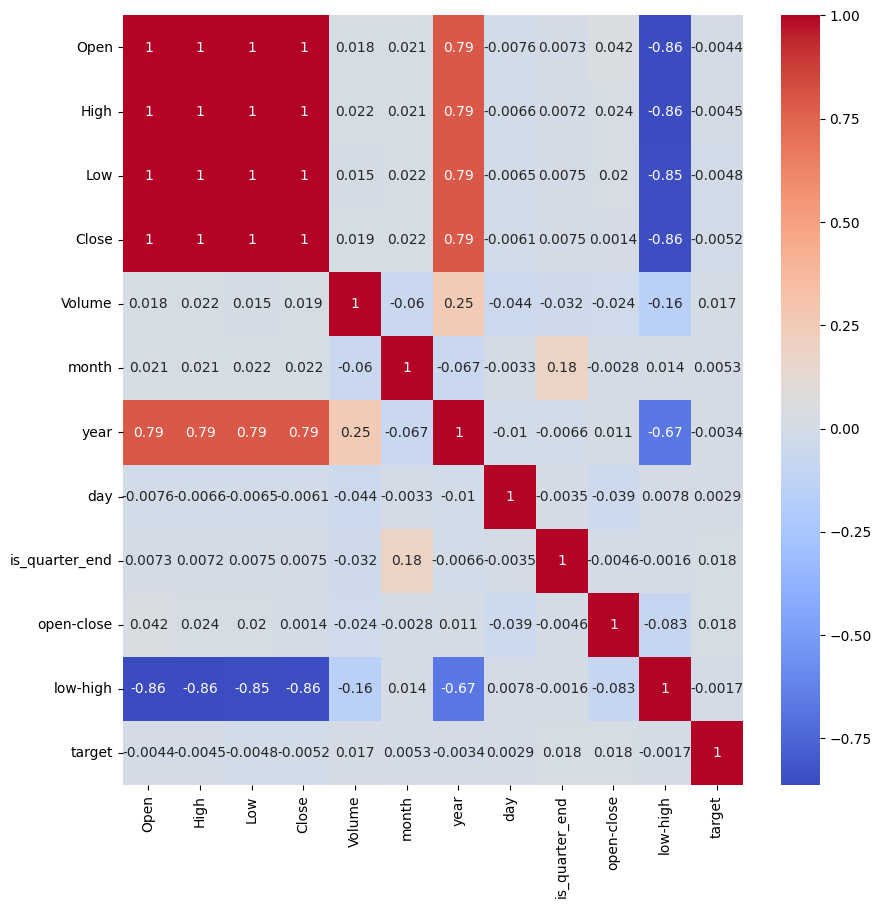

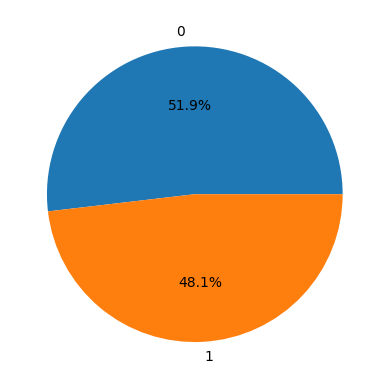

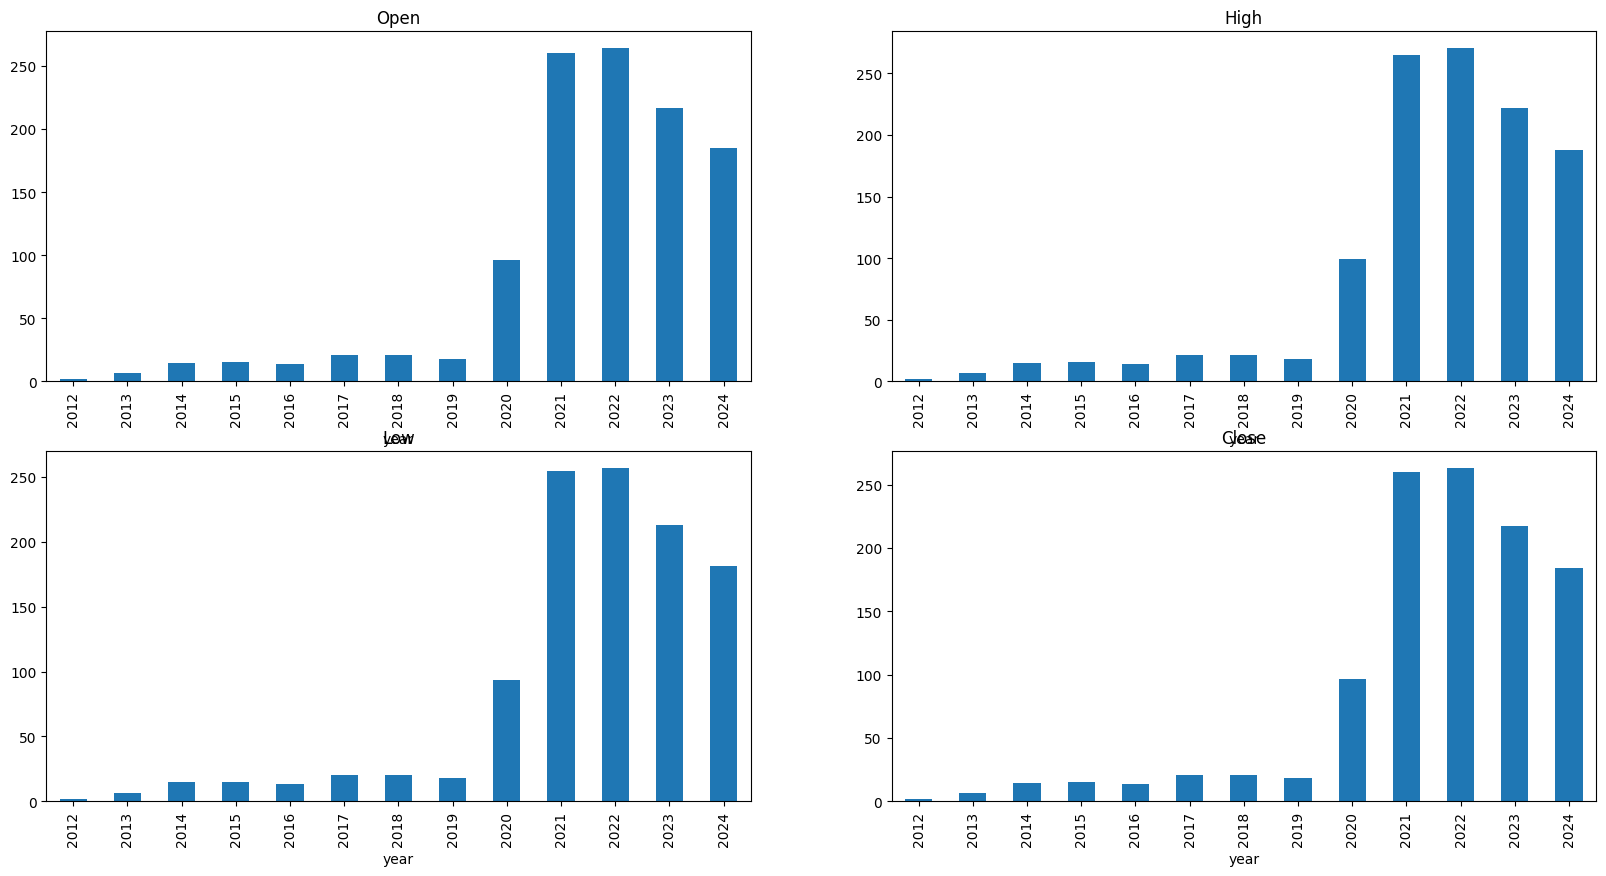

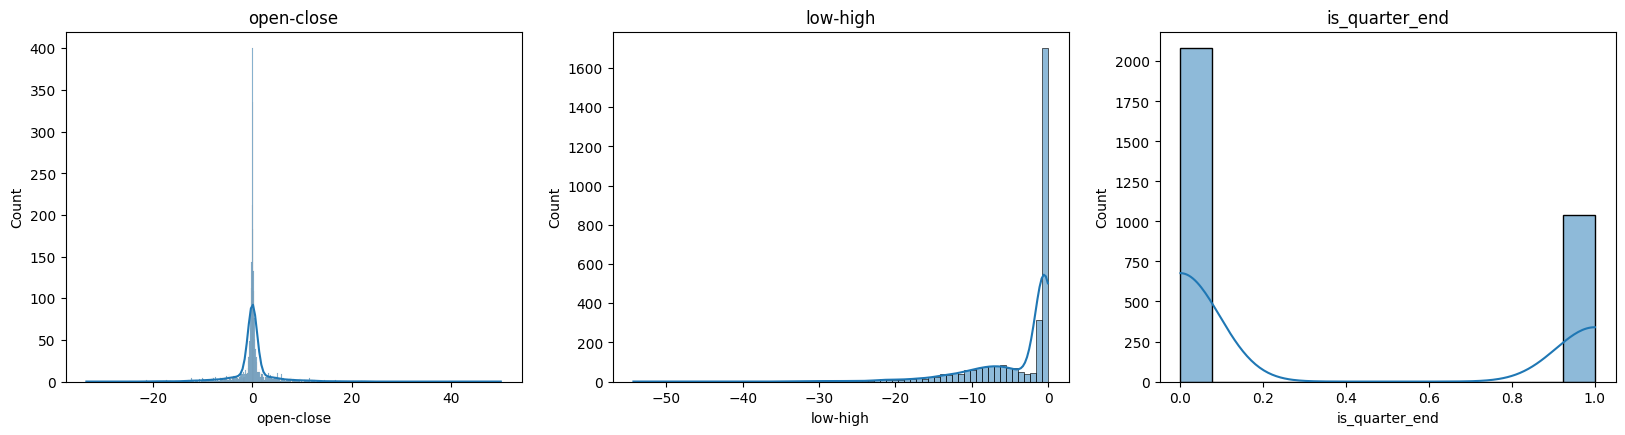

                     Open       High        Low      Close        Volume  \
is_quarter_end                                                             
0               82.773597  84.575403  80.822903  82.729213  1.080718e+08   
1               84.388539  86.213719  82.441794  84.385330  1.028297e+08   

                   month         year        day  open-close  low-high  \
is_quarter_end                                                           
0               5.991831  2017.771264  15.751562    0.044385 -3.752500   
1               7.331735  2017.720997  15.686481    0.003209 -3.771925   

                  target  
is_quarter_end            
0               0.512254  
1               0.531160  


In [4]:
# Importing libraries to analyze and handle data
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Load the data
df = pd.read_csv('tesla.csv', sep=',')
print(df.head())

# Check if the 'Close' and 'Adj Close' columns are the same
print(df[df['Close'] == df['Adj Close']].shape)

# Drop the 'Adj Close' column since they are the same
df = df.drop(['Adj Close'], axis=1)
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Split 'Date' into 'year', 'month', and 'day'
splitted = df['Date'].str.split('-', expand=True)
df['month'] = splitted[1].astype(int)
df['year'] = splitted[0].astype(int)
df['day'] = splitted[2].astype(int)
df = df.drop(['Date'], axis=1)
print(df.head())

# Add a feature to indicate if it's the end of a quarter
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
print(df.head())

# Check again for missing values
print(df.isnull().sum())

# Convert 'year' to integer type
df['year'] = df['year'].astype(int)
print(df.info())

# Display mean values grouped by 'is_quarter_end'
print(df.groupby('is_quarter_end').mean())

# Create new features
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Prepare the feature set and target variable
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scale the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

# Define the models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train and evaluate the models
for model in models:
    model.fit(X_train, Y_train)
    print(f'{model.__class__.__name__} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))
    print()

# Visualize the accuracy of the XGBoost model through the confusion matrix
ConfusionMatrixDisplay.from_estimator(models[2], X_valid, Y_valid)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.show()

# Visualize the target distribution
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

# Visualize mean values grouped by year
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
    plt.title(col)
plt.show()

# Visualize the distribution of features
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open-close', 'low-high', 'is_quarter_end']):
    plt.subplot(2, 3, i+1)
    sb.histplot(df[col], kde=True)
    plt.title(col)
plt.show()

print(df.groupby('is_quarter_end').mean())
